In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/transformed_data.csv'

In [4]:
df = pd.read_csv('/content/transformed_data.csv')

In [5]:
selected_columns = df[['vehicle_count', 'average_speed']]

In [6]:
correlation_matrix = selected_columns.corr()

In [7]:
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                vehicle_count  average_speed
vehicle_count       1.000000      -0.775435
average_speed      -0.775435       1.000000


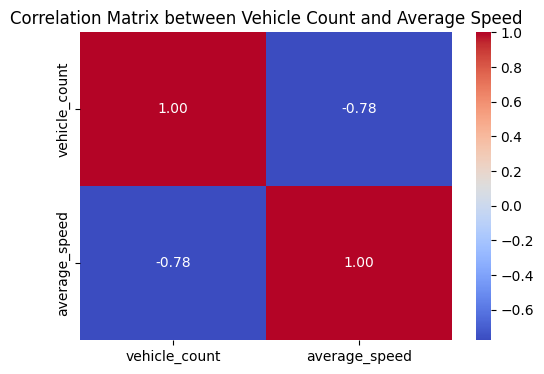

In [8]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Vehicle Count and Average Speed')
plt.show()

**Time-Series Analysis of Traffic Patterns**

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])   #'timestamp' column to datetime

In [10]:
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()  #Extract hour and day of the week


In [11]:
hourly_traffic = df.groupby('hour').agg({'vehicle_count': 'mean', 'average_speed': 'mean'}).reset_index()
#Grouping hour to analyze traffic volume and speed patterns

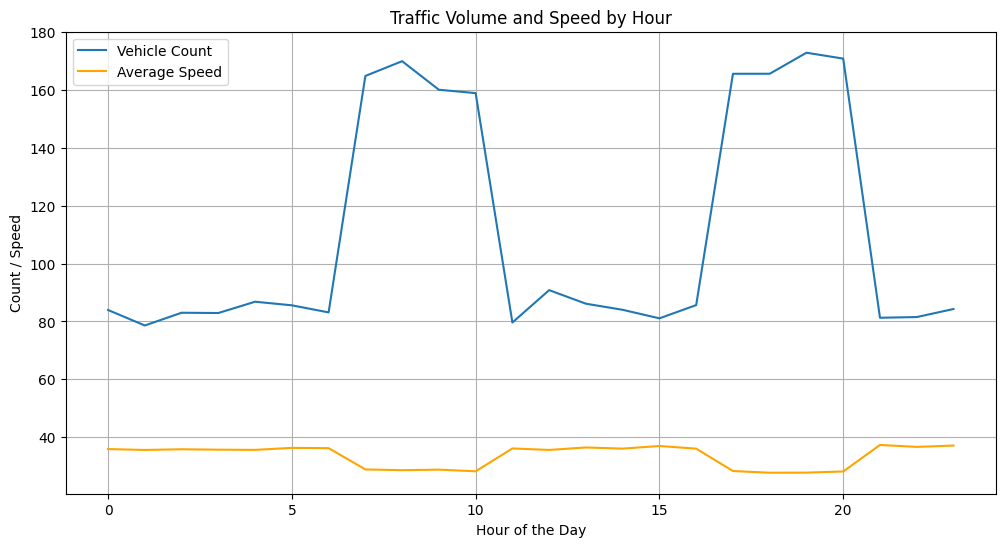

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='vehicle_count', data=hourly_traffic, label='Vehicle Count')
sns.lineplot(x='hour', y='average_speed', data=hourly_traffic, label='Average Speed', color='orange')
plt.title('Traffic Volume and Speed by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count / Speed')
plt.legend()
plt.grid(True)
plt.show()

## As the vehicle count is increasing the average speed is decreasing during different hours of the day

**Traffic Analysis by Weather Condition**

In [13]:
weather_analysis = df.groupby('weather_condition').agg({'vehicle_count': 'mean', 'average_speed': 'mean'}).reset_index()

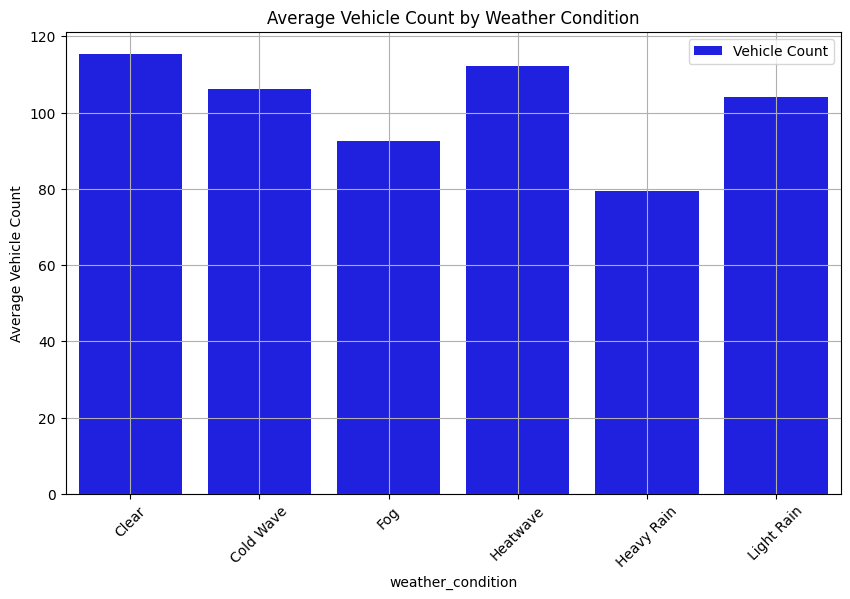

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_condition', y='vehicle_count', data=weather_analysis, color='blue', label='Vehicle Count')
plt.title('Average Vehicle Count by Weather Condition')
plt.xticks(rotation=45)
plt.ylabel('Average Vehicle Count')
plt.grid(True)
plt.show()

 **Holiday and Event Traffic Impact**

In [15]:
holiday_event_traffic = df[df['is_holiday'] == 1]
regular_traffic = df[df['is_holiday'] == 0]  #Analyzing traffic on holidays and special events

In [16]:
avg_holiday_traffic = holiday_event_traffic['vehicle_count'].mean()
avg_regular_traffic = regular_traffic['vehicle_count'].mean()

In [17]:
print(f"Average Vehicle Count on Holidays: {avg_holiday_traffic}")
print(f"Average Vehicle Count on Regular Days: {avg_regular_traffic}")


Average Vehicle Count on Holidays: 72.7901278409091
Average Vehicle Count on Regular Days: 125.9802714425633


**Analysis for Intersection Traffic**

In [18]:
intersection_traffic = df.groupby('intersection_id')['vehicle_count'].mean().reset_index()

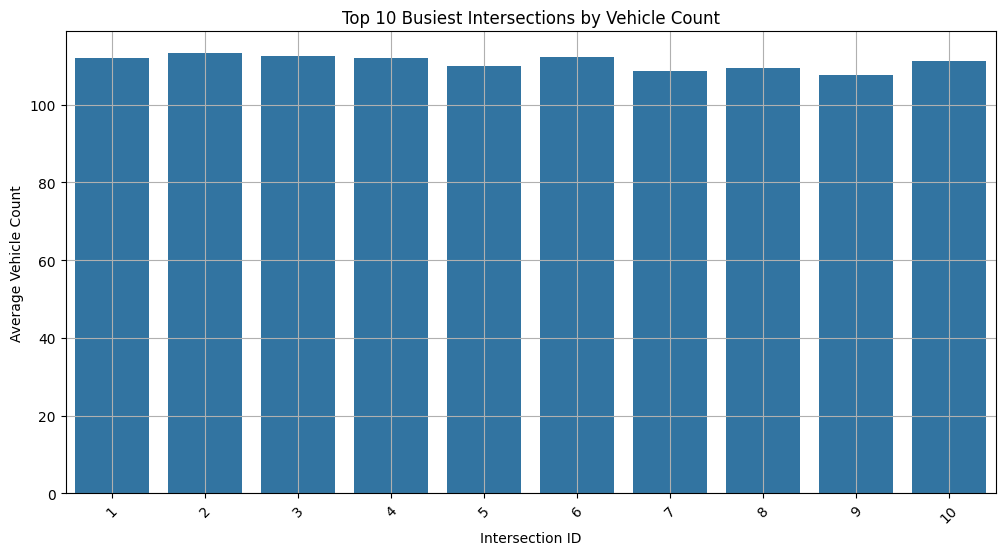

In [19]:
top_intersections = intersection_traffic.sort_values(by='vehicle_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='intersection_id', y='vehicle_count', data=top_intersections)
plt.title('Top 10 Busiest Intersections by Vehicle Count')
plt.xlabel('Intersection ID')
plt.ylabel('Average Vehicle Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

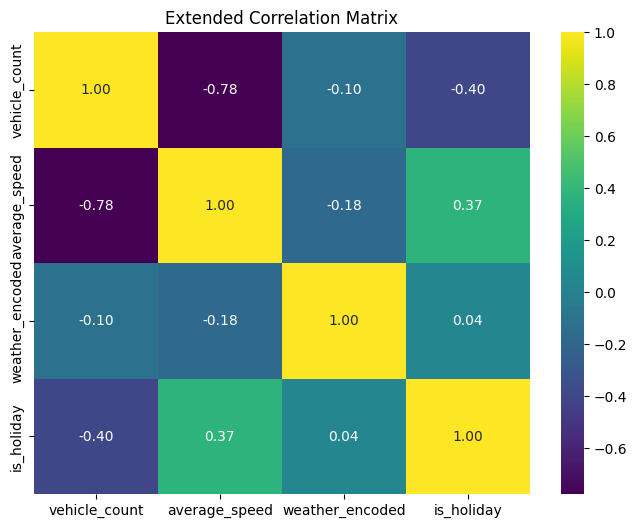

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
df['weather_encoded'] = le.fit_transform(df['weather_condition'])

# Calculate correlation including encoded weather
extended_corr = df[['vehicle_count', 'average_speed', 'weather_encoded', 'is_holiday']].corr()

# Heatmap for the extended correlation analysis
plt.figure(figsize=(8, 6))
sns.heatmap(extended_corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Extended Correlation Matrix')
plt.show()